In [2]:
from load_data import cleanDS_Store
from data_loader import dataLoader, api_dataLoader, dataLoader_diff
from training import train
import torch
import time

from evaluations import plotLossGraph, evaluation
from show_images import show_all_images
import os
import torch

In [ ]:
from load_data import cleanDS_Store
from data_loader import dataLoader, dataLoader_diff
from training import train
import torch
import time

torch.manual_seed(99)
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

full_path = './content/whole/lips/'
base_path = full_path
cleanDS_Store(base_path)
train_loader, valid_loader, test_loader = dataLoader(base_path)

start_time = time.time()
# model_types = ['customresnet','resnet50','resnet18', 'smallcnn']
result_folder = './results/results_2024-05-21-p-lopo-pixel-rgb-color-jitter/'
model_path = train(result_folder, train_loader, valid_loader, model_type = 'resnet18', num_epochs = 301, learning_rate = 0.001, pretrained=False)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time} seconds")

elapsed_time_minutes = elapsed_time / 60

print(f"Training time: {elapsed_time_minutes:.2f} minutes")

training:  270 test:  38 validation:  76


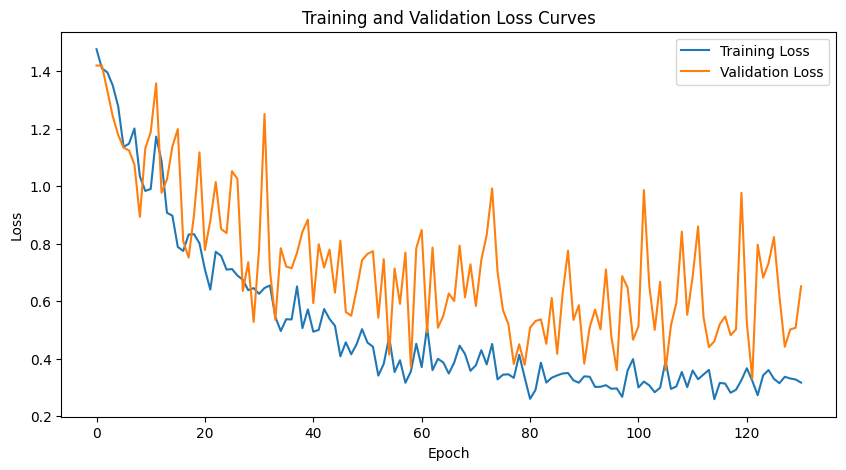

Test Accuracy: 89.47%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.88      0.88      0.88        17
           2       0.81      0.85      0.83        20
           3       0.95      0.95      0.95        20

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.90        76
weighted avg       0.90      0.89      0.90        76



In [1]:
from evaluations import plotLossGraph, evaluation
from data_loader import dataLoader, dataLoader_seperate, dataLoader_diff,api_dataLoader
from show_images import show_all_images
import os
import torch
from load_data import cleanDS_Store

from show_images import show_evaluation_images

torch.manual_seed(99)

folder_path = './content/Dataset/Paper/'
train_loader, valid_loader, test_loader = dataLoader(folder_path)
# valid_loader = api_dataLoader(folder_path)
# model_types = ['customresnet','resnet50','resnet18', 'smallcnn']
result_folder = './results/results_2024-05-24-dataset-paper-resnet18/'

train_losses = [float(line.strip()) for line in open(os.path.join(result_folder,'train_losses.txt'),'r')]
valid_losses = [float(line.strip()) for line in open(os.path.join(result_folder,'valid_losses.txt'),'r')]
plotLossGraph(train_losses,valid_losses)

model, test_plots = evaluation(test_loader, result_folder,'best_100.pth', model_type = 'resnet18', num_classes = 4)

class_labels = ['50','60','70','80']
show_evaluation_images(test_plots, folder_path,result_folder, class_labels=class_labels, num_cols=4)

Test Accuracy: 100.00%


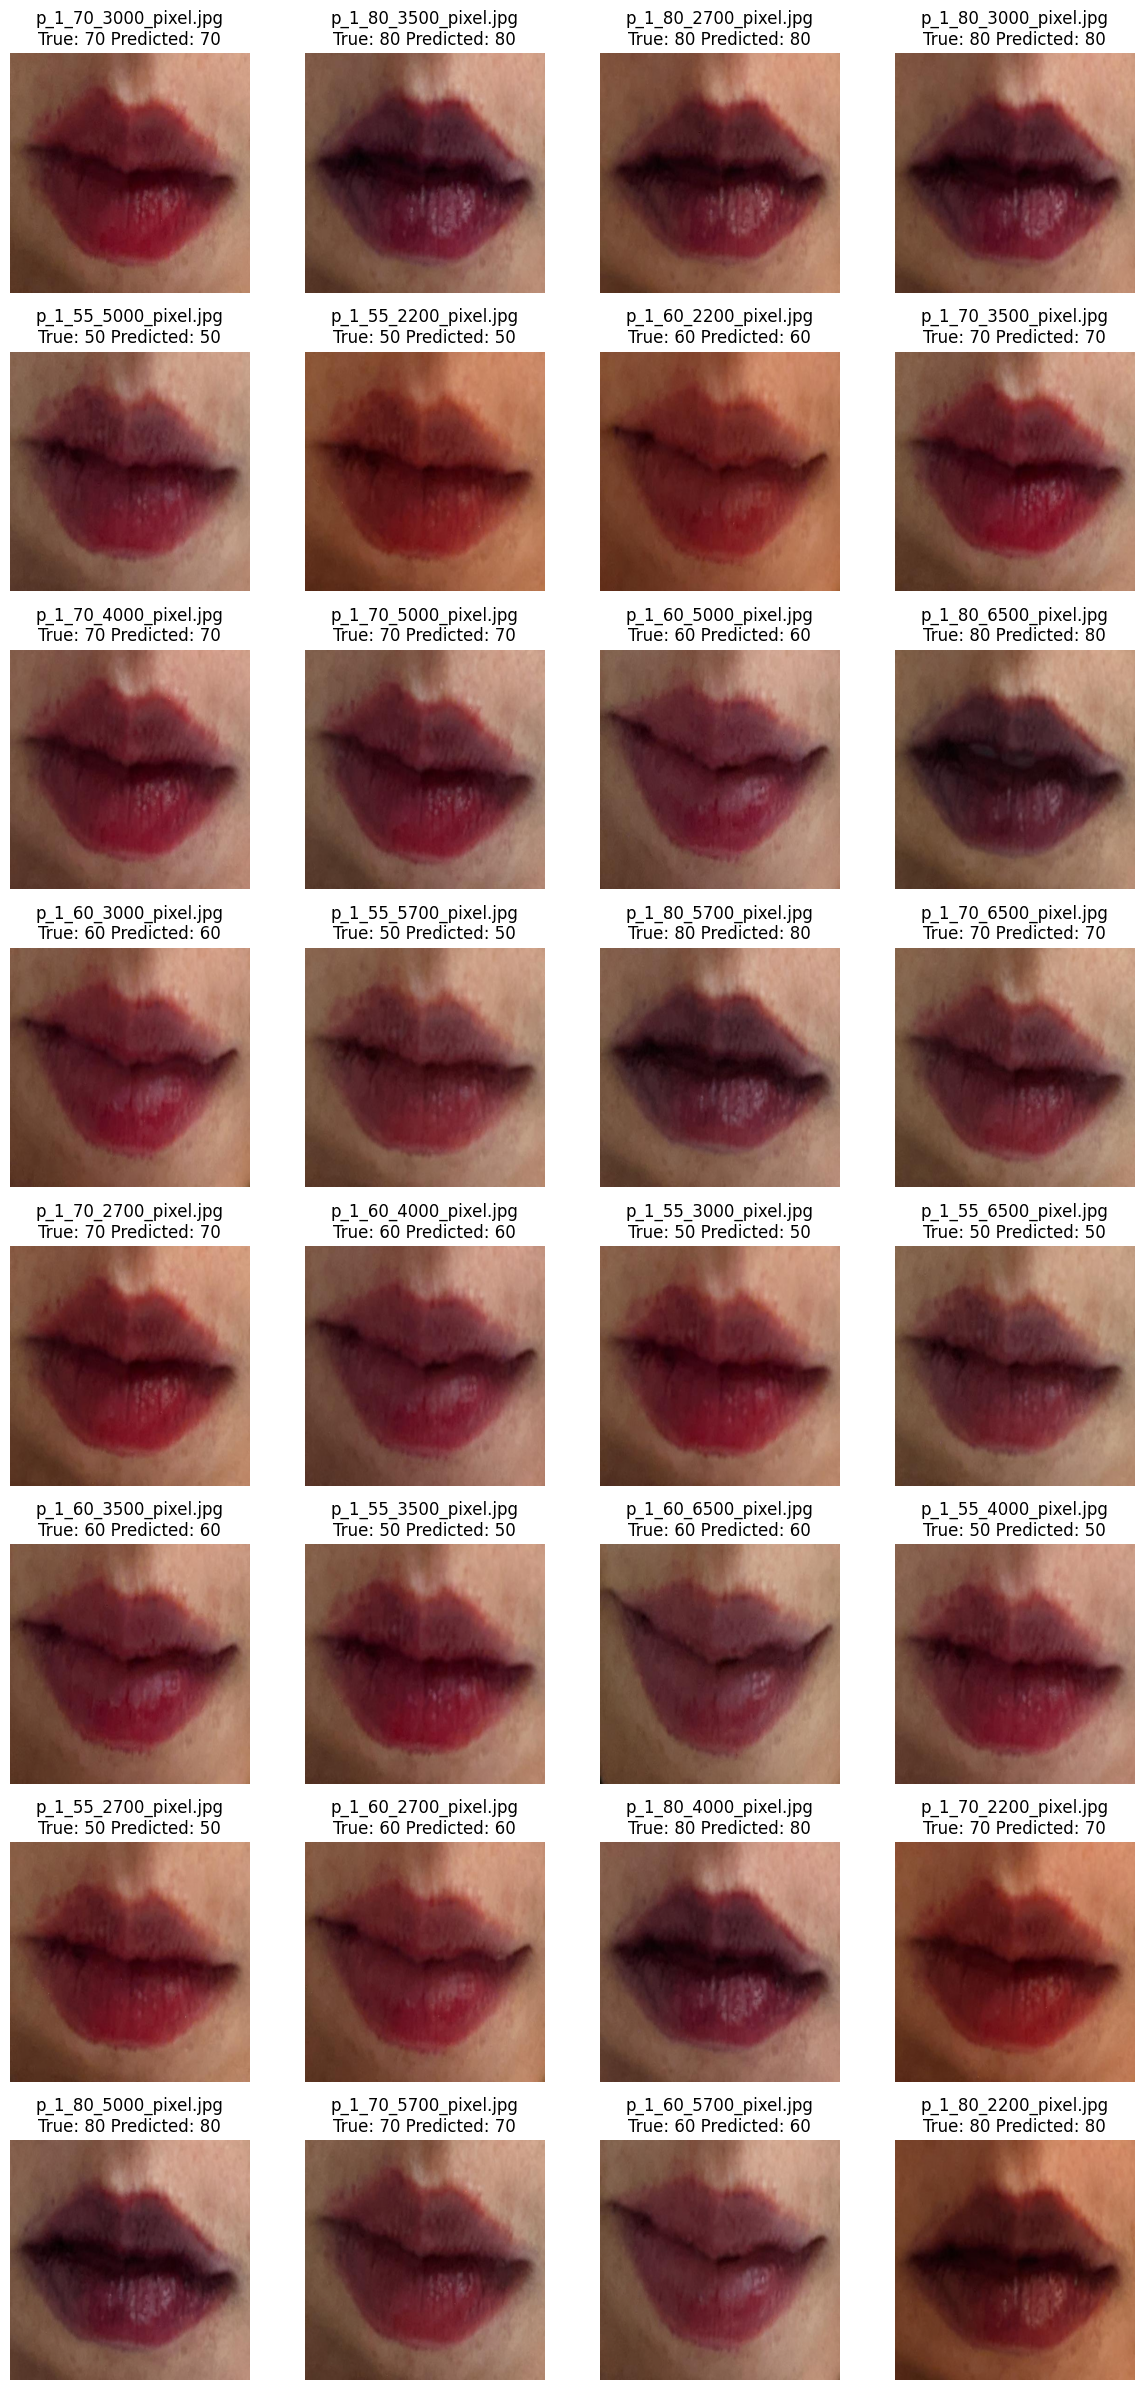

In [4]:
from data_loader import api_dataLoader, random_dataLoader, dataLoader_diff
from show_images import show_evaluation_images

folder_path = './content/Dataset/PaperLOPOChange/TestPixel/'
result_folder = './results/results_2024-05-24-dataset-paper-resnet18'

loader = api_dataLoader(folder_path)

model, test_plots = evaluation(loader, result_folder,'best_100.pth', model_type = 'resnet18', num_classes = 4)

class_labels = ['50','60','70','80']
show_evaluation_images(test_plots, folder_path,result_folder, class_labels=class_labels, num_cols=4,show = True)